In [1]:
import numpy as np
import os
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

os.chdir('C:\\Users\\solov\\Desktop\\sample_project\\data')

# Importing data about Atlanta

## I do exact same processing of data as with Phoenix dataset

In [2]:
df = pd.read_excel('Atlanta_departures_2019_AA.xlsx') #importing

df = df.drop(['Delay Carrier (Minutes)','Delay Weather (Minutes)','Delay National Aviation System (Minutes)',
              'Delay Security (Minutes)', 'Delay Late Aircraft Arrival (Minutes)'],axis = 1) #dropping unnecessary columns

df.columns = df.columns.str.lower()
df.columns = df.columns.str.split()
df.columns = df.columns.str.join('_') #transforming all column names to lower case joined by _

df.columns

Index(['carrier_code', 'date_(mm/dd/yyyy)', 'flight_number', 'tail_number',
       'destination_airport', 'scheduled_departure_time',
       'actual_departure_time', 'scheduled_elapsed_time_(minutes)',
       'actual_elapsed_time_(minutes)', 'departure_delay_(minutes)',
       'wheels-off_time', 'taxi-out_time_(minutes)'],
      dtype='object')

## Missing values

### By printing the bars with numbers of values in columns I see that all columns have 12781 values (rows) with 
### only tail_number column exhibiting some missing values as was the case with PHX dataset

Axes(0.125,0.11;0.775x0.77)


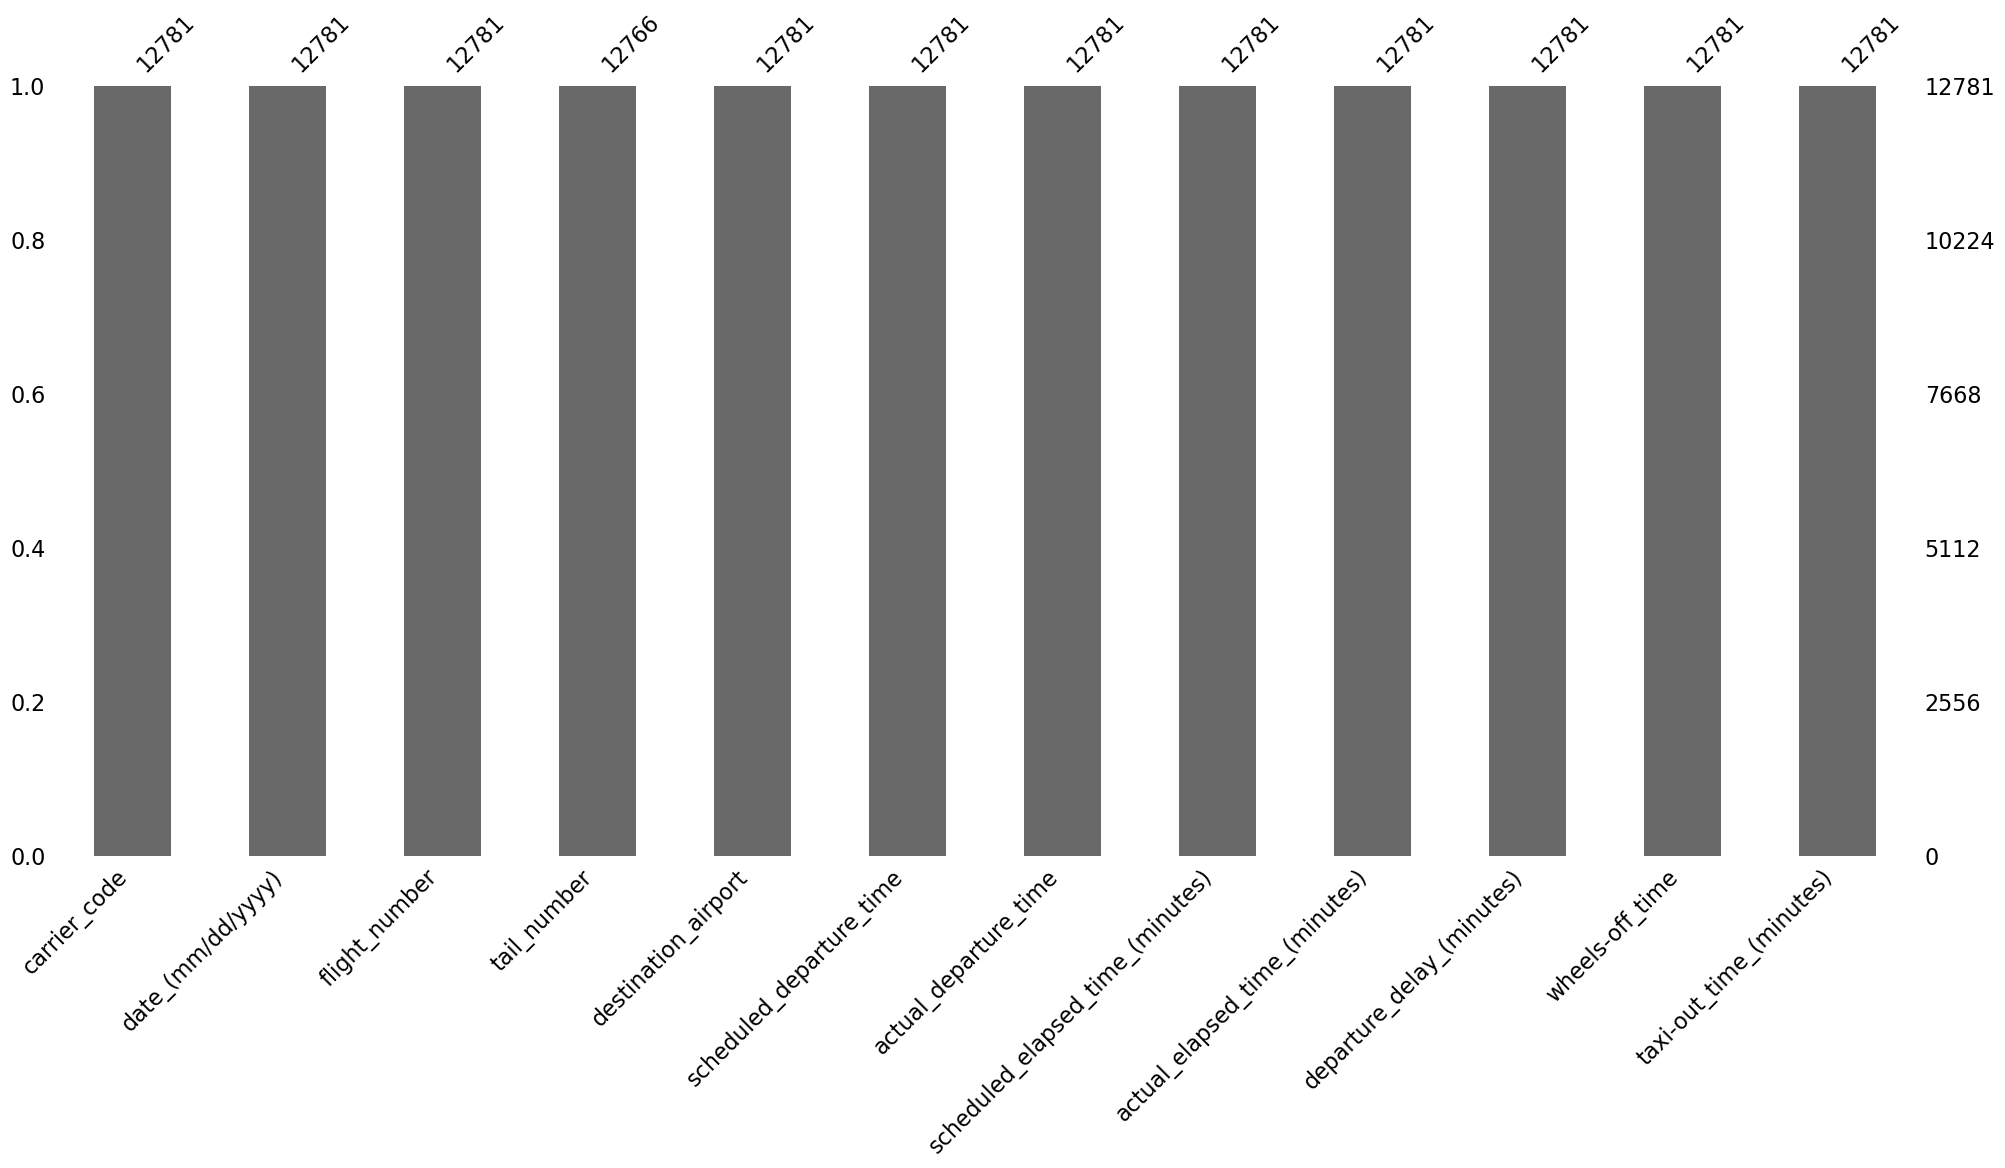

In [3]:
print(msno.bar(df))

In [4]:
missing_values = df.isnull().sum()
missing_values.sort_values(ascending = True)

carrier_code                         0
date_(mm/dd/yyyy)                    0
flight_number                        0
destination_airport                  0
scheduled_departure_time             0
actual_departure_time                0
scheduled_elapsed_time_(minutes)     0
actual_elapsed_time_(minutes)        0
departure_delay_(minutes)            0
wheels-off_time                      0
taxi-out_time_(minutes)              0
tail_number                         15
dtype: int64

In [5]:
#creating dataframe to show all missing tail_number rows

tail_number_0 = df[df.tail_number.isnull()]
tail_number_0

,carrier_code,date_(mm/dd/yyyy),flight_number,tail_number,destination_airport,scheduled_departure_time,actual_departure_time,scheduled_elapsed_time_(minutes),actual_elapsed_time_(minutes),departure_delay_(minutes),wheels-off_time,taxi-out_time_(minutes)
2268,AA,2019-11-03 00:00:00,2778,NaN,DFW,10:05:00,00:00:00,155,0,0,00:00:00,0
2270,AA,2019-12-03 00:00:00,222,NaN,DFW,12:30:00,00:00:00,150,0,0,00:00:00,0
2333,AA,03/13/2019,2778,NaN,DFW,10:05:00,00:00:00,155,0,0,00:00:00,0
2380,AA,03/15/2019,1309,NaN,DFW,14:19:00,00:00:00,151,0,0,00:00:00,0
2385,AA,03/15/2019,1618,NaN,MIA,20:27:00,00:00:00,120,0,0,00:00:00,0
2411,AA,03/16/2019,1309,NaN,DFW,14:19:00,00:00:00,151,0,0,00:00:00,0
2434,AA,03/17/2019,222,NaN,DFW,12:30:00,00:00:00,150,0,0,00:00:00,0
2449,AA,03/17/2019,1618,NaN,MIA,20:27:00,00:00:00,120,0,0,00:00:00,0
2526,AA,03/19/2019,2214,NaN,MIA,16:36:00,00:00:00,123,0,0,00:00:00,0
3389,AA,04/16/2019,2770,NaN,DFW,06:03:00,00:00:00,152,0,0,00:00:00,0


In [6]:
#creating list with indexes of rows containing tail_number 0
indexes_tail_number_0 = tail_number_0.index.tolist()

In [7]:
#dropping rows with tail_number 0
df = df.drop(indexes_tail_number_0,axis= 0 )

In [8]:
missing_values = df.isnull().sum()
missing_values.sort_values(ascending = True)
#we see that there's no missing values anymore in the dataframe

carrier_code                        0
date_(mm/dd/yyyy)                   0
flight_number                       0
tail_number                         0
destination_airport                 0
scheduled_departure_time            0
actual_departure_time               0
scheduled_elapsed_time_(minutes)    0
actual_elapsed_time_(minutes)       0
departure_delay_(minutes)           0
wheels-off_time                     0
taxi-out_time_(minutes)             0
dtype: int64

Axes(0.125,0.11;0.775x0.77)


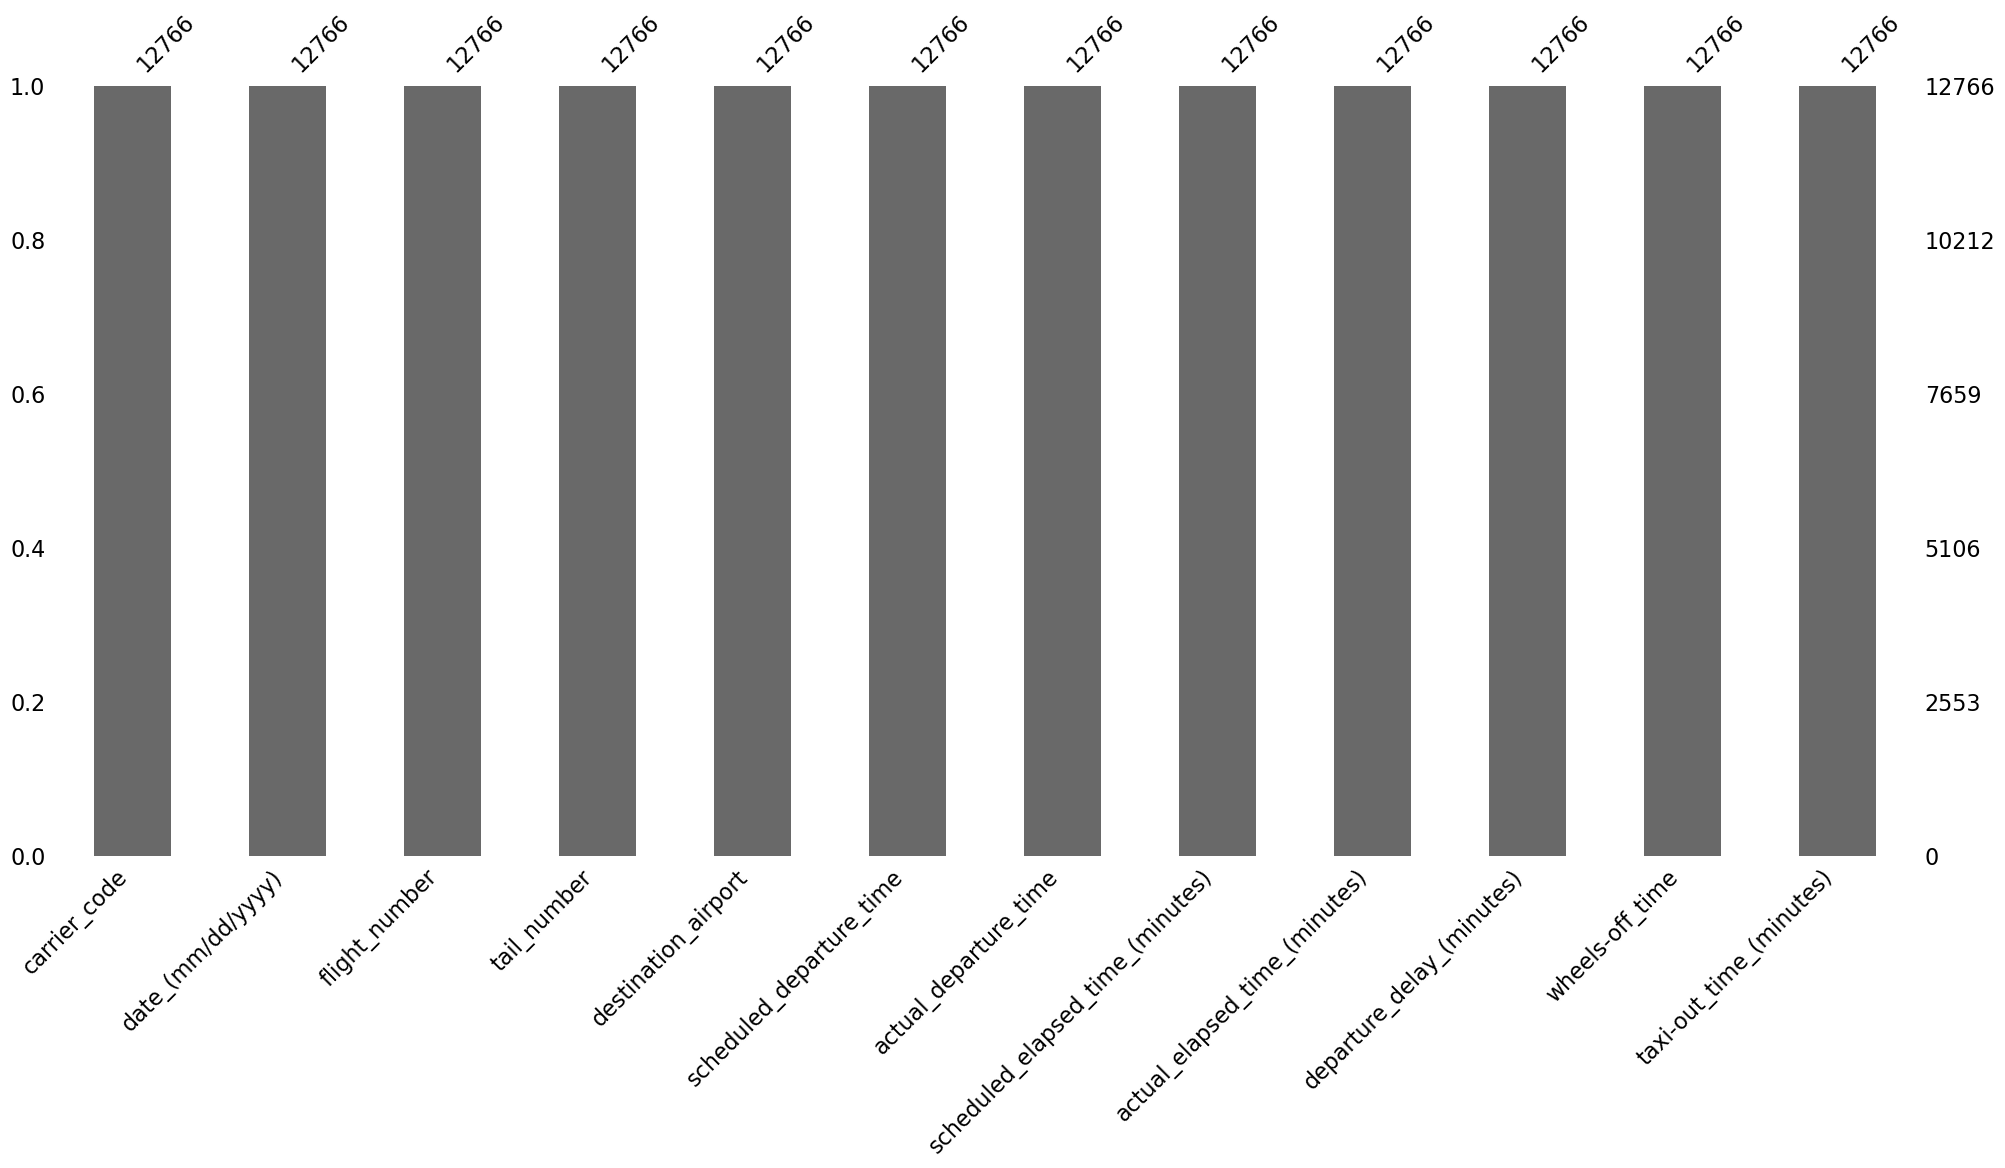

In [9]:
print(msno.bar(df)) #and every column contains 12766 rows with no missing values

## Types of variables conversion

In [10]:
df.dtypes

carrier_code                        object
date_(mm/dd/yyyy)                   object
flight_number                        int64
tail_number                         object
destination_airport                 object
scheduled_departure_time            object
actual_departure_time               object
scheduled_elapsed_time_(minutes)     int64
actual_elapsed_time_(minutes)        int64
departure_delay_(minutes)            int64
wheels-off_time                     object
taxi-out_time_(minutes)              int64
dtype: object

In [11]:
df['date_mixed'] = df['date_(mm/dd/yyyy)']

df = df.drop('date_(mm/dd/yyyy)',axis= 1)

In [12]:
df.head()

,carrier_code,flight_number,tail_number,destination_airport,scheduled_departure_time,actual_departure_time,scheduled_elapsed_time_(minutes),actual_elapsed_time_(minutes),departure_delay_(minutes),wheels-off_time,taxi-out_time_(minutes),date_mixed
0,AA,242,N9624T,DFW,18:23:00,20:20:00,156,145,117,20:35:00,15,2019-01-01 00:00:00
1,AA,401,N717UW,PHL,15:22:00,15:21:00,128,104,-1,15:33:00,12,2019-01-01 00:00:00
2,AA,426,N810AW,CLT,10:56:00,10:52:00,81,76,-4,11:08:00,16,2019-01-01 00:00:00
3,AA,440,N601AW,PHX,17:40:00,17:34:00,262,270,-6,17:50:00,16,2019-01-01 00:00:00
4,AA,448,N746UW,DFW,21:46:00,22:17:00,146,141,31,22:36:00,19,2019-01-01 00:00:00


In [13]:
df['date_mm/dd/yyyy'] = pd.to_datetime(df['date_mixed'], format='%m/%d/%Y', errors='coerce')

In [14]:
df.head()

,carrier_code,flight_number,tail_number,destination_airport,scheduled_departure_time,actual_departure_time,scheduled_elapsed_time_(minutes),actual_elapsed_time_(minutes),departure_delay_(minutes),wheels-off_time,taxi-out_time_(minutes),date_mixed,date_mm/dd/yyyy
0,AA,242,N9624T,DFW,18:23:00,20:20:00,156,145,117,20:35:00,15,2019-01-01 00:00:00,2019-01-01
1,AA,401,N717UW,PHL,15:22:00,15:21:00,128,104,-1,15:33:00,12,2019-01-01 00:00:00,2019-01-01
2,AA,426,N810AW,CLT,10:56:00,10:52:00,81,76,-4,11:08:00,16,2019-01-01 00:00:00,2019-01-01
3,AA,440,N601AW,PHX,17:40:00,17:34:00,262,270,-6,17:50:00,16,2019-01-01 00:00:00,2019-01-01
4,AA,448,N746UW,DFW,21:46:00,22:17:00,146,141,31,22:36:00,19,2019-01-01 00:00:00,2019-01-01


In [15]:
#Checking if there are no null values in the column 'date_mm/dd/yyyy' and seeing that it is 0

df['date_mm/dd/yyyy'].isnull().sum()

0

In [16]:
#Now we can drop the date_mixed column as it is unnecessary anymore
df = df.drop('date_mixed',axis=1)

In [17]:
#Let's see how the types of columns in dataframe have changed
#We see now that column 'date_mm/dd/yyyy' is of datetime64 type and not object anymore
df.dtypes

carrier_code                                object
flight_number                                int64
tail_number                                 object
destination_airport                         object
scheduled_departure_time                    object
actual_departure_time                       object
scheduled_elapsed_time_(minutes)             int64
actual_elapsed_time_(minutes)                int64
departure_delay_(minutes)                    int64
wheels-off_time                             object
taxi-out_time_(minutes)                      int64
date_mm/dd/yyyy                     datetime64[ns]
dtype: object

## Now let's convert columns <span style = 'color: red;'>actual_departure_time, scheduled_departure_time, wheels-off_time</span>

In [18]:
df['actual_departure_time'] = pd.to_datetime(df['actual_departure_time'], format='%H:%M:%S').dt.time
df['actual_departure_time_DT'] = df['date_mm/dd/yyyy'] + pd.to_timedelta(df['actual_departure_time'].astype(str))


df['scheduled_departure_time'] = pd.to_datetime(df['scheduled_departure_time'], format='%H:%M:%S').dt.time
df['scheduled_departure_time_DT'] = df['date_mm/dd/yyyy'] + pd.to_timedelta(df['scheduled_departure_time'].astype(str))

df['wheels-off_time'] = pd.to_datetime(df['wheels-off_time'], format='%H:%M:%S').dt.time
df['wheels-off_time_DT'] = df['date_mm/dd/yyyy'] + pd.to_timedelta(df['wheels-off_time'].astype(str))

In [19]:
df = df.drop(['scheduled_departure_time', 'actual_departure_time', 'wheels-off_time'], axis = 1) #dropping columns without _DT after them

df['actual_departure_time'] = df['actual_departure_time_DT']
df['scheduled_departure_time'] = df['scheduled_departure_time_DT']
df['wheels-off_time'] = df['wheels-off_time_DT'] #renaming the columns so they don't have _DT after them

df = df.drop(['actual_departure_time_DT','scheduled_departure_time_DT','wheels-off_time_DT'], axis=1) #dropping columns that have _DT after them


In [20]:
df.head()

,carrier_code,flight_number,tail_number,destination_airport,scheduled_elapsed_time_(minutes),actual_elapsed_time_(minutes),departure_delay_(minutes),taxi-out_time_(minutes),date_mm/dd/yyyy,actual_departure_time,scheduled_departure_time,wheels-off_time
0,AA,242,N9624T,DFW,156,145,117,15,2019-01-01,2019-01-01 20:20:00,2019-01-01 18:23:00,2019-01-01 20:35:00
1,AA,401,N717UW,PHL,128,104,-1,12,2019-01-01,2019-01-01 15:21:00,2019-01-01 15:22:00,2019-01-01 15:33:00
2,AA,426,N810AW,CLT,81,76,-4,16,2019-01-01,2019-01-01 10:52:00,2019-01-01 10:56:00,2019-01-01 11:08:00
3,AA,440,N601AW,PHX,262,270,-6,16,2019-01-01,2019-01-01 17:34:00,2019-01-01 17:40:00,2019-01-01 17:50:00
4,AA,448,N746UW,DFW,146,141,31,19,2019-01-01,2019-01-01 22:17:00,2019-01-01 21:46:00,2019-01-01 22:36:00


## Let's check the types now:

In [21]:
df.dtypes

carrier_code                                object
flight_number                                int64
tail_number                                 object
destination_airport                         object
scheduled_elapsed_time_(minutes)             int64
actual_elapsed_time_(minutes)                int64
departure_delay_(minutes)                    int64
taxi-out_time_(minutes)                      int64
date_mm/dd/yyyy                     datetime64[ns]
actual_departure_time               datetime64[ns]
scheduled_departure_time            datetime64[ns]
wheels-off_time                     datetime64[ns]
dtype: object

## Now for future purposes I'll create a column named DepDel15 this column will have number 1 if the flight is delayed for more than 15 mins at departure and number 0 if the plane is on time or delayed for less than 15 mins

In [22]:
# this function I'm defining is meant to classify
# if the flight is considered delayed or not
def classify_delay(departure_delay):
    if departure_delay >= 15:
        return 1
    else:
        return 0

df['DepDel15'] = df['departure_delay_(minutes)'].apply(classify_delay)

In [23]:
df['DepDel15'] #now we see that there's a column displaying 0 and 1,
#0=flight on time, 1 -flight delayed

0        1
1        0
2        0
3        0
4        1
        ..
12776    0
12777    0
12778    0
12779    0
12780    0
Name: DepDel15, Length: 12766, dtype: int64

In [24]:
df

,carrier_code,flight_number,tail_number,destination_airport,scheduled_elapsed_time_(minutes),actual_elapsed_time_(minutes),departure_delay_(minutes),taxi-out_time_(minutes),date_mm/dd/yyyy,actual_departure_time,scheduled_departure_time,wheels-off_time,DepDel15
0,AA,242,N9624T,DFW,156,145,117,15,2019-01-01,2019-01-01 20:20:00,2019-01-01 18:23:00,2019-01-01 20:35:00,1
1,AA,401,N717UW,PHL,128,104,-1,12,2019-01-01,2019-01-01 15:21:00,2019-01-01 15:22:00,2019-01-01 15:33:00,0
2,AA,426,N810AW,CLT,81,76,-4,16,2019-01-01,2019-01-01 10:52:00,2019-01-01 10:56:00,2019-01-01 11:08:00,0
3,AA,440,N601AW,PHX,262,270,-6,16,2019-01-01,2019-01-01 17:34:00,2019-01-01 17:40:00,2019-01-01 17:50:00,0
4,AA,448,N746UW,DFW,146,141,31,19,2019-01-01,2019-01-01 22:17:00,2019-01-01 21:46:00,2019-01-01 22:36:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12776,AA,2737,N906AA,LAX,311,295,-3,21,2019-12-31,2019-12-31 11:06:00,2019-12-31 11:09:00,2019-12-31 11:27:00,0
12777,AA,2770,N146AA,DFW,153,159,-4,30,2019-12-31,2019-12-31 05:56:00,2019-12-31 06:00:00,2019-12-31 06:26:00,0
12778,AA,2778,N305NX,DFW,153,148,-5,18,2019-12-31,2019-12-31 09:53:00,2019-12-31 09:58:00,2019-12-31 10:11:00,0
12779,AA,2893,N834AW,ORD,131,131,-5,21,2019-12-31,2019-12-31 06:07:00,2019-12-31 06:12:00,2019-12-31 06:28:00,0


## Now let's create a dataframe with all delayed flights that departed ATL in 2019

In [25]:
delayed_ATL = df[df.DepDel15 == 1]

In [26]:
delayed_ATL

,carrier_code,flight_number,tail_number,destination_airport,scheduled_elapsed_time_(minutes),actual_elapsed_time_(minutes),departure_delay_(minutes),taxi-out_time_(minutes),date_mm/dd/yyyy,actual_departure_time,scheduled_departure_time,wheels-off_time,DepDel15
0,AA,242,N9624T,DFW,156,145,117,15,2019-01-01,2019-01-01 20:20:00,2019-01-01 18:23:00,2019-01-01 20:35:00,1
4,AA,448,N746UW,DFW,146,141,31,19,2019-01-01,2019-01-01 22:17:00,2019-01-01 21:46:00,2019-01-01 22:36:00,1
5,AA,466,N753US,CLT,77,71,15,21,2019-01-01,2019-01-01 12:35:00,2019-01-01 12:20:00,2019-01-01 12:56:00,1
9,AA,799,N751UW,CLT,79,68,60,15,2019-01-01,2019-01-01 09:51:00,2019-01-01 08:51:00,2019-01-01 10:06:00,1
13,AA,1284,N976NN,CLT,74,61,26,16,2019-01-01,2019-01-01 22:40:00,2019-01-01 22:14:00,2019-01-01 22:56:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12724,AA,440,N680AW,PHX,269,256,34,14,2019-12-30,2019-12-30 18:40:00,2019-12-30 18:06:00,2019-12-30 18:54:00,1
12748,AA,2737,N165NN,LAX,311,296,112,17,2019-12-30,2019-12-30 13:01:00,2019-12-30 11:09:00,2019-12-30 13:18:00,1
12749,AA,2770,N929AA,DFW,153,151,21,15,2019-12-30,2019-12-30 06:21:00,2019-12-30 06:00:00,2019-12-30 06:36:00,1
12757,AA,799,N708UW,CLT,88,72,16,20,2019-12-31,2019-12-31 09:08:00,2019-12-31 08:52:00,2019-12-31 09:28:00,1


## <span style="color: red;"> Now let's export the dataframe with delayed flights and the dataframe with all flights for future use</span>

In [27]:
df.to_csv('processed_Atlanta_departures_2019_AA.csv', index = False)
delayed_ATL.to_csv('delayed_ATL_2019_AA.csv', index = False)